Atributo con mayor correlación lineal con el target: MedInc
Valor de correlación: 0.6880752079585484


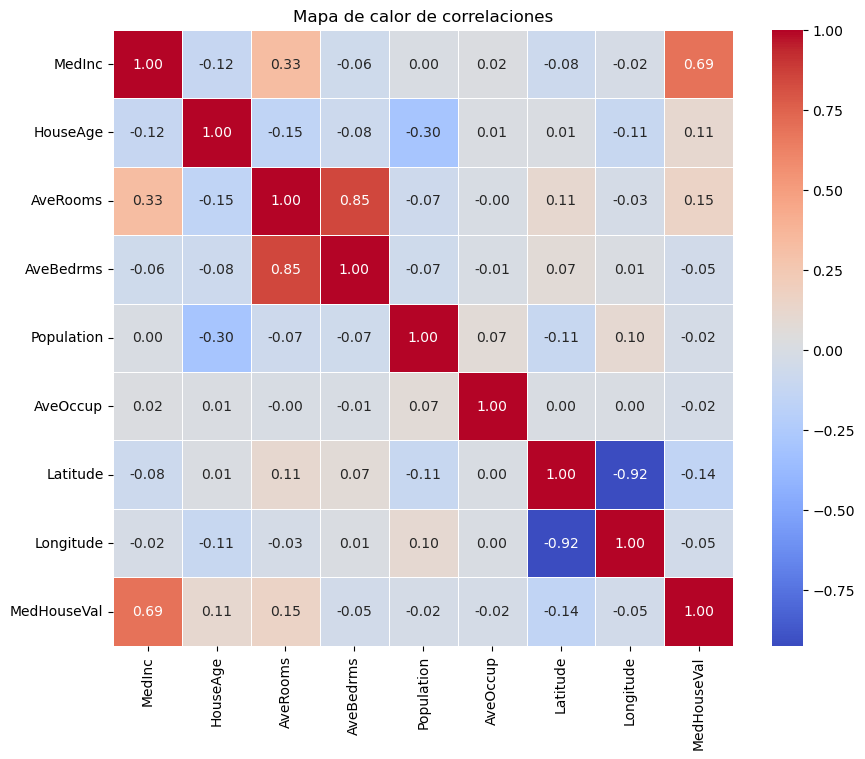

In [5]:
# ---------------------------------------------------
"""
 1) Obtener la correlación entre los atributos y los atributos con el target. 
    ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? 
    Se puede obtener los valores o directamente graficar usando un mapa de calor.

    RESPUESTA: 
    A partir del grafico de calor mas abajo vemos que:
    - El atributo con mayor correlacion lineal con el target es: "MedInc". El ingreso medio ("MedInc") está altamente correlacionado con nuestro valor objetivo ("MedHouseVal"), 
    lo que indica que esta variable tendrá el papel más importante.
    - La latitud ("Latitude") y la longitud ("Longitude") están correlacionadas negativamente.  Esto significa que, a medida que una de estas variables aumenta, 
    la otra tiende a disminuir. En términos geográficos, esto refleja cómo está distribuido el estado de California (es mas alargado que ancho) y "podriamos" presumir
    que las casas mas caras estan sobre la costa y estan distribuidas a lo largo (Longitud) del estado. En este punto esto es solo una conjetura inicial y no una conclusion final.
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Cargar el dataset
california_housing = fetch_california_housing(as_frame=True)
# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

# Calcular la matriz de correlación
correlation_matrix = df_california.corr()

# Identificar el atributo más correlacionado con el target ("MedHouseVal")
target_corr = correlation_matrix["MedHouseVal"].drop("MedHouseVal").sort_values(ascending=False)
most_correlated = target_corr.idxmax()

print("Atributo con mayor correlación lineal con el target:", most_correlated)
print("Valor de correlación:", target_corr[most_correlated])

# Graficar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()


In [6]:
# ---------------------------------------------------
"""
2) Graficar los histogramas de los diferentes atributos y el target. 
¿Qué tipo de forma de histograma se observa? 
¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?
"""

'\n2) Graficar los histogramas de los diferentes atributos y el target. \n¿Qué tipo de forma de histograma se observa? \n¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?\n'

In [7]:
# ---------------------------------------------------
"""
3) Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. 
- ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.
"""


'\n3) Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. \n- ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.\n'

In [8]:
# ---------------------------------------------------
"""
5) Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α
"""

'\n5) Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α\n'

In [9]:
# ---------------------------------------------------
"""
6) Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?
"""


'\n6) Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?\n'